In [1]:
import pandas as pd
df = pd.read_csv('etf.csv')
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


spy = 027635
acwx = 037046
AGG = 016417 
FMB = 036536 
VNO = 031446

In [2]:
#Create year column in our dataframe to calculate annual returns and standard deviation
df['date']=pd.to_datetime(df['caldt'])
df['date'] = df['date'].map(lambda x: 100*x.year + x.month)
df['date']=df['date'].map(lambda x:str(x)[:4])

In [3]:
#Create ticker symbols from our fund numbers to keep things simple
spy_etf = df.loc[df["crsp_fundno"] == 27635]
acwx_etf = df.loc[df["crsp_fundno"] == 37046]
agg_etf = df.loc[df["crsp_fundno"] == 16417]
fmb_etf = df.loc[df["crsp_fundno"] == 36536]
vno_etf = df.loc[df["crsp_fundno"] == 31446]
spy_etf['ticker'] = 'spy'
acwx_etf['ticker'] = 'acwx'
agg_etf['ticker'] = 'agg'
fmb_etf['ticker'] = 'fmb'
vno_etf['ticker'] = 'vno'

C:\Users\19785\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\19785\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\19785\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [4]:
#Create annual returns functions
import numpy as np

def annual_return(annual_returns):
    count = 0
    returns = []
    for percent in annual_returns:
        #Start at $100 on day 1
        if count == 0:
            y = 100 + percent*100
            returns.append(y)
            count +=1
        else:
            #calculate returns after day one
            y = returns[-1]*percent + returns[-1]
            returns.append(y)
        count += 1
    return returns


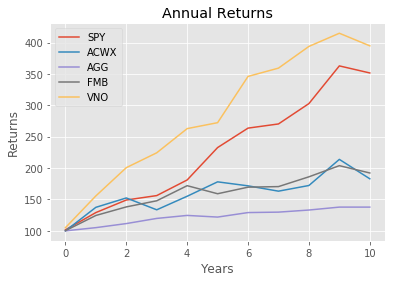

In [5]:
#groupy ticker and date aggregating on daily returns to get the annual returns
spy_returns = spy_etf.groupby(['ticker', 'date'])[['dret']].sum()
acwx_returns = acwx_etf.groupby(['ticker', 'date'])[['dret']].sum()
agg_returns = agg_etf.groupby(['ticker', 'date'])[['dret']].sum()
fmb_returns = fmb_etf.groupby(['ticker', 'date'])[['dret']].sum()
vno_returns = vno_etf.groupby(['ticker', 'date'])[['dret']].sum()

#send through our function
spy = annual_return(spy_returns['dret'])
acwx = annual_return(acwx_returns['dret'])
agg = annual_return(agg_returns['dret'])
fmb = annual_return(fmb_returns['dret'])
vno = annual_return(vno_returns['dret'])

#Plot annual returns for each ETF
plot(spy, label='SPY')
plot(acwx, label='ACWX')
plot(agg, label='AGG')
plot(fmb, label='FMB')
plot(vno, label='VNO')
plt.title('Annual Returns')
plt.xlabel('Years')
plt.ylabel('Returns')
plt.legend()

In [6]:
#Function for our standard deviation
def annual_std(annual_stds):
    count = 0
    returns = []
    for percent in annual_stds:
        y = percent*100
        returns.append(y)
    return returns

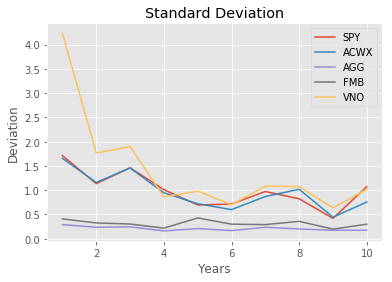

In [7]:
spy_std = spy_etf.groupby(['ticker', 'date'])[['dret']].std()
acwx_std = acwx_etf.groupby(['ticker', 'date'])[['dret']].std()
agg_std = agg_etf.groupby(['ticker', 'date'])[['dret']].std()
fmb_std = fmb_etf.groupby(['ticker', 'date'])[['dret']].std()
vno_std = vno_etf.groupby(['ticker', 'date'])[['dret']].std()

spy = annual_std(spy_std['dret'])
acwx = annual_std(acwx_std['dret'])
agg = annual_std(agg_std['dret'])
fmb = annual_std(fmb_std['dret'])
vno = annual_std(vno_std['dret'])
plt.title('Standard Deviation')
plt.xlabel('Years')
plt.ylabel('Deviation')
plot(spy, label='SPY')
plot(acwx, label='ACWX')
plot(agg, label='AGG')
plot(fmb, label='FMB')
plot(vno, label='VNO')
plt.legend()

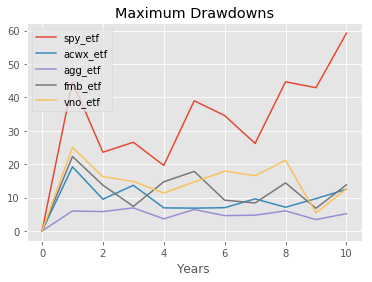

In [8]:
import matplotlib.pyplot as plt
def returnDRAW(e):
    hngg = e[["dnav", "date"]].groupby("date").max().reset_index()
    hnggg = e[["dnav", "date"]].groupby("date").min().reset_index()
    this_hngg = hngg.merge(hnggg, left_on = "date", right_on = "date", suffixes = ("_max", "_min"))
    this_hngg["yearly drawdown"] = this_hngg["dnav_max"] - this_hngg["dnav_min"]
    return this_hngg[["yearly drawdown"]]
etfs = [spy_etf, acwx_etf, agg_etf, fmb_etf, vno_etf]
etfs_names = ["spy_etf", "acwx_etf", "agg_etf", "fmb_etf", "vno_etf"]
fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(etfs)):
    this_etf = returnDRAW(etfs[i])
    ax.plot(this_etf, label = etfs_names[i])
ax.legend()
plt.title('Maximum Drawdowns')
plt.xlabel('Years')
plt.show()

In [9]:
#Annualized Returns and Stdev
spy_ret = spy_etf.groupby(['ticker'])[['dret']].mean()
spy_std = spy_etf.groupby(['ticker'])[['dret']].std()
acwx_ret=acwx_etf.groupby(['ticker'])[['dret']].mean()
acwx_std=acwx_etf.groupby(['ticker'])[['dret']].std()
AGG_ret=agg_etf.groupby(['ticker'])[['dret']].mean()
AGG_std=agg_etf.groupby(['ticker'])[['dret']].std()
FMB_ret=fmb_etf.groupby(['ticker'])[['dret']].mean()
FMB_std=fmb_etf.groupby(['ticker'])[['dret']].std()
VNO_ret=vno_etf.groupby(['ticker'])[['dret']].mean()
VNO_std=vno_etf.groupby(['ticker'])[['dret']].std()
#Sharpe Ratio
sharpe_spy = spy_ret/spy_std
sharpe_ratio_spy = (252**0.5) * sharpe_spy
sharpe_acwx = acwx_ret/acwx_std
sharpe_ratio_acwx = (252**0.5) * sharpe_acwx
sharpe_agg = AGG_ret/AGG_std
sharpe_ratio_agg = (252**0.5) * sharpe_agg
sharpe_fmb = FMB_ret/FMB_std
sharpe_ratio_fmb = (252**0.5) * sharpe_fmb
sharpe_vno = VNO_ret/VNO_std
sharpe_ratio_vno = (252**0.5) * sharpe_vno

print(sharpe_ratio_spy)
print(sharpe_ratio_acwx)
print(sharpe_ratio_agg)
print(sharpe_ratio_fmb)
print(sharpe_ratio_vno)

            dret
ticker          
spy     0.818169
            dret
ticker          
acwx    0.452055
            dret
ticker          
agg     0.970279
            dret
ticker          
fmb     1.396411
            dret
ticker          
vno     0.561193


In [11]:
spy_ret
# spy_std

,dret
ticker,
spy,0.000548


In [11]:
#list of etfs
etfs = [spy_etf, acwx_etf, agg_etf, fmb_etf, vno_etf]

#function to get date column for our etfs
def set_date(stuff):
    for etf in stuff:
        etf['date'] = pd.to_datetime(etf['caldt'])
        etf.set_index(etf['date'], inplace=True)


def normal_returns(stuff):
    for etf in stuff:
        etf['Normal Return'] = ((etf['dnav'] - etf['dnav'].shift(1))/ etf['dnav'].shift(1)) + 1

normal_returns(etfs)
set_date(etfs)

C:\Users\19785\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\19785\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
spy_etf = spy_etf.rename({'dret': 'dret_spy', 'Normal Return': 'spy_ret'}, axis=1)
acwx_etf = acwx_etf.rename({'dret': 'dret_acwx', 'Normal Return': 'acwx_ret'}, axis=1) 
agg_etf = agg_etf.rename({'dret': 'dret_agg', 'Normal Return': 'agg_ret'}, axis=1)
fmb_etf = fmb_etf.rename({'dret': 'dret_fmb', 'Normal Return': 'fmb_ret'}, axis=1)
vno_etf = vno_etf.rename({'dret': 'dret_vno', 'Normal Return': 'vno_ret'}, axis=1)

In [15]:
def get_month(etf):
    etf['month'] = pd.DatetimeIndex(etf['date']).month

etfs_ = [spy_etf, acwx_etf, agg_etf, fmb_etf, vno_etf]

for x in etfs:
    get_month(x)
    
    
for x in etfs:
    x['shift'] = x['date'].shift(1)

def get_month_shift(etf):
    etf['month_shift'] = pd.DatetimeIndex(etf['shift']).month

etfs_ = [spy_etf, acwx_etf, agg_etf, fmb_etf, vno_etf]

for x in etfs:
    get_month_shift(x)

import functools
etfs = [spy_etf, acwx_etf, agg_etf, fmb_etf, vno_etf]

df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['caldt'],
                                            how='outer'), etfs)

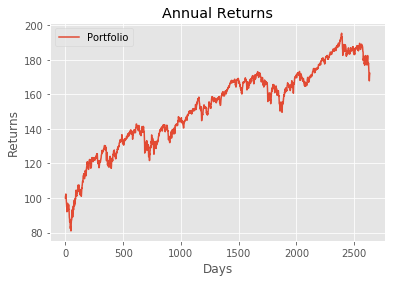

In [16]:
total_returns = []
spy_returns = []
acwx_returns = []
agg_returns = []
fmb_returns = []
vno_returns = []

i = 0
for index, row in df_merged.iterrows():
    if i == 0:
        spy_returns.append(100*0.3)
        acwx_returns.append(100*0.25)
        agg_returns.append(100*0.20)
        fmb_returns.append(100*0.15)
        vno_returns.append(100*0.1)
        total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        i += 1
    else:
        spy_returns.append(spy_returns[-1]*row['spy_ret'])
        acwx_returns.append(acwx_returns[-1]*row['acwx_ret'])
        agg_returns.append(agg_returns[-1]*row['agg_ret'])
        fmb_returns.append(fmb_returns[-1]*row['fmb_ret'])
        vno_returns.append(vno_returns[-1]*row['vno_ret'])
        total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        if row['month'] != row['month_shift']:
            spy_returns.append(total_returns[-1]*0.3)
            acwx_returns.append(total_returns[-1]*0.25)
            agg_returns.append(total_returns[-1]*0.2)
            fmb_returns.append(total_returns[-1]*0.15)
            vno_returns.append(total_returns[-1]*0.1)
            total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        
plot(total_returns, label='Portfolio')
plt.title('Annual Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.legend()

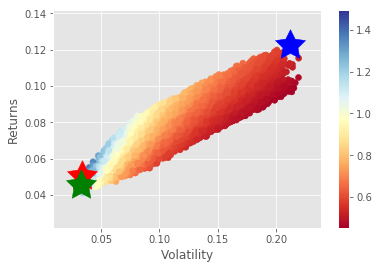

In [326]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import random

random.seed(69)
stocks = ['SPY','ACWX','AGG','FMB', 'VNO']
#download daily price data for each of the stocks in the portfolio
data = (web.DataReader(stocks,data_source='yahoo',start='12/31/2008', 
                       end='12/31/2018')['Adj Close'])
data.sort_index(inplace=True)
#convert daily stock prices into daily returns
returns = data.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
#     weights = np.array(np.random.uniform(low=0.01, high=0.45, size=5))

    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = (results[0,i]) / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(5):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3], stocks[4]])

#Create masks to only return weights in our specified range
mask = (results_frame['SPY'] < .45)
mask1 = (results_frame['ACWX'] < .45)
mask2 = (results_frame['AGG'] < .45)
mask3 = (results_frame['FMB'] < .45)
mask4 = (results_frame['VNO'] < .45)
results_frame1 = results_frame[mask & mask4 & mask1 & mask2 & mask3]
#locate position of portfolio with highest Sharpe Ratio

mask5 = (results_frame1['sharpe'] == results_frame1['sharpe'].max())
max_sharpe_port = results_frame1[mask5]

mask6 = (results_frame1['stdev'] == results_frame1['stdev'].min())
min_vol_port = results_frame1[mask6]

mask7 = (results_frame1['ret'] == results_frame1['ret'].max())
max_returns = results_frame1[mask7]

# max_sharpe_port = results_frame1.iloc[results_frame1['sharpe'].idxmax()]

# max_returns = results_frame1.iloc[results_frame1['ret'].idxmax()]
#locate positon of portfolio with minimum standard deviation
# min_vol_port = results_frame1.iloc[results_frame1['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame1.stdev,results_frame1.ret,c=results_frame1.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port['stdev'],max_sharpe_port['ret'],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port['stdev'],min_vol_port['ret'],marker=(5,1,0),color='g',s=1000)
plt.scatter(max_returns['stdev'],max_returns['ret'],marker=(5,1,0),color='b',s=1000)

In [335]:
print('Max Sharpe: \n',max_sharpe_port,'\n')
print('Minimum Volatility:\n ',min_vol_port,'\n')
print('Max Returns:\n ',max_returns)

Max Sharpe: 
          ret     stdev    sharpe       SPY      ACWX       AGG       FMB  \
140  0.05039  0.033755  1.492797  0.008854  0.441518  0.391294  0.152366   

          VNO  
140  0.005969   

Minimum Volatility:
              ret     stdev    sharpe       SPY      ACWX       AGG       FMB  \
19949  0.045372  0.032443  1.398531  0.054625  0.441592  0.414824  0.086205   

            VNO  
19949  0.002754   

Max Returns:
             ret     stdev    sharpe       SPY      ACWX       AGG       FMB  \
1907  0.122344  0.212408  0.575988  0.147702  0.010105  0.004671  0.425333   

          VNO  
1907  0.41219  


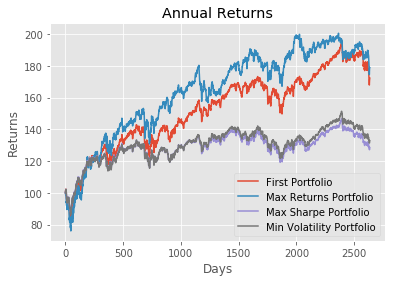

In [417]:
#For each portfolio rebalance monthly and the plot the results


total_returns = []
spy_returns = []
acwx_returns = []
agg_returns = []
fmb_returns = []
vno_returns = []

i = 0
for index, row in df_merged.iterrows():
    if i == 0:
        #Starting weights for portfolio
        spy_returns.append(100*0.3)
        acwx_returns.append(100*0.25)
        agg_returns.append(100*0.20)
        fmb_returns.append(100*0.15)
        vno_returns.append(100*0.1)
        total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        i += 1
    else:
        #Returns over the month
        spy_returns.append(spy_returns[-1]*row['spy_ret'])
        acwx_returns.append(acwx_returns[-1]*row['acwx_ret'])
        agg_returns.append(agg_returns[-1]*row['agg_ret'])
        fmb_returns.append(fmb_returns[-1]*row['fmb_ret'])
        vno_returns.append(vno_returns[-1]*row['vno_ret'])
        total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        if row['month'] != row['month_shift']:
            #Rebalance on the last day of every month
            spy_returns.append(total_returns[-1]*0.3)
            acwx_returns.append(total_returns[-1]*0.25)
            agg_returns.append(total_returns[-1]*0.2)
            fmb_returns.append(total_returns[-1]*0.15)
            vno_returns.append(total_returns[-1]*0.1)
            total_returns.append(spy_returns[-1]+acwx_returns[-1]+agg_returns[-1]+fmb_returns[-1]+vno_returns[-1])
        
total_returns1 = []
spy_returns1 = []
acwx_returns1 = []
agg_returns1 = []
fmb_returns1 = []
vno_returns1 = []

i = 0
for index, row in df_merged.iterrows():
    if i == 0:
        spy_returns1.append(100*float(min_vol_port['SPY']))
        acwx_returns1.append(100*float(min_vol_port['ACWX']))
        agg_returns1.append(100*float(min_vol_port['AGG']))
        fmb_returns1.append(100*float(min_vol_port['FMB']))
        vno_returns1.append(100*float(min_vol_port['VNO']))
        total_returns1.append(spy_returns1[-1]+acwx_returns1[-1]+agg_returns1[-1]+fmb_returns1[-1]+vno_returns1[-1])
        i += 1
    else:
        spy_returns1.append(spy_returns1[-1]*row['spy_ret'])
        acwx_returns1.append(acwx_returns1[-1]*row['acwx_ret'])
        agg_returns1.append(agg_returns1[-1]*row['agg_ret'])
        fmb_returns1.append(fmb_returns1[-1]*row['fmb_ret'])
        vno_returns1.append(vno_returns1[-1]*row['vno_ret'])
        total_returns1.append(spy_returns1[-1]+acwx_returns1[-1]+agg_returns1[-1]+fmb_returns1[-1]+vno_returns1[-1])
        if row['month'] != row['month_shift']:
            spy_returns1.append(total_returns1[-1]*min_vol_port['SPY'])
            acwx_returns1.append(total_returns1[-1]*min_vol_port['ACWX'])
            agg_returns1.append(total_returns1[-1]*min_vol_port['AGG'])
            fmb_returns1.append(total_returns1[-1]*min_vol_port['FMB'])
            vno_returns1.append(total_returns1[-1]*min_vol_port['VNO'])
            total_returns1.append(spy_returns1[-1]+acwx_returns1[-1]+agg_returns1[-1]+fmb_returns1[-1]+vno_returns1[-1])
        

total_returns_sharpe = []
spy_returns_sharpe = []
acwx_returns_sharpe = []
agg_returns_sharpe = []
fmb_returns_sharpe = []
vno_returns_sharpe = []

i = 0
for index, row in df_merged.iterrows():
    if i == 0:
        spy_returns_sharpe.append(100*float(max_sharpe_port['SPY']))
        acwx_returns_sharpe.append(100*float(max_sharpe_port['ACWX']))
        agg_returns_sharpe.append(100*float(max_sharpe_port['AGG']))
        fmb_returns_sharpe.append(100*float(max_sharpe_port['FMB']))
        vno_returns_sharpe.append(100*float(max_sharpe_port['VNO']))
        total_returns_sharpe.append(spy_returns_sharpe[-1]+acwx_returns_sharpe[-1]+agg_returns_sharpe[-1]+fmb_returns_sharpe[-1]+vno_returns_sharpe[-1])
        i += 1
    else:
        spy_returns_sharpe.append(spy_returns_sharpe[-1]*row['spy_ret'])
        acwx_returns_sharpe.append(acwx_returns_sharpe[-1]*row['acwx_ret'])
        agg_returns_sharpe.append(agg_returns_sharpe[-1]*row['agg_ret'])
        fmb_returns_sharpe.append(fmb_returns_sharpe[-1]*row['fmb_ret'])
        vno_returns_sharpe.append(vno_returns_sharpe[-1]*row['vno_ret'])
        total_returns_sharpe.append(spy_returns_sharpe[-1]+acwx_returns_sharpe[-1]+agg_returns_sharpe[-1]+fmb_returns_sharpe[-1]+vno_returns_sharpe[-1])
        if row['month'] != row['month_shift']:
            spy_returns_sharpe.append(total_returns_sharpe[-1]*max_sharpe_port['SPY'])
            acwx_returns_sharpe.append(total_returns_sharpe[-1]*max_sharpe_port['ACWX'])
            agg_returns_sharpe.append(total_returns_sharpe[-1]*max_sharpe_port['AGG'])
            fmb_returns_sharpe.append(total_returns_sharpe[-1]*max_sharpe_port['FMB'])
            vno_returns_sharpe.append(total_returns_sharpe[-1]*max_sharpe_port['VNO'])
            total_returns_sharpe.append(spy_returns_sharpe[-1]+acwx_returns_sharpe[-1]+agg_returns_sharpe[-1]+fmb_returns_sharpe[-1]+vno_returns_sharpe[-1])

total_returns12 = []
spy_returns12 = []
acwx_returns12 = []
agg_returns12 = []
fmb_returns12 = []
vno_returns12 = []

i = 0
for index, row in df_merged.iterrows():
    if i == 0:
        spy_returns12.append(100*float(max_returns['SPY']))
        acwx_returns12.append(100*float(max_returns['ACWX']))
        agg_returns12.append(100*float(max_returns['AGG']))
        fmb_returns12.append(100*float(max_returns['FMB']))
        vno_returns12.append(100*float(max_returns['VNO']))
        total_returns12.append(spy_returns12[-1]+acwx_returns12[-1]+agg_returns12[-1]+fmb_returns12[-1]+vno_returns12[-1])
        i += 1
    else:
        spy_returns12.append(spy_returns12[-1]*row['spy_ret'])
        acwx_returns12.append(acwx_returns12[-1]*row['acwx_ret'])
        agg_returns12.append(agg_returns12[-1]*row['agg_ret'])
        fmb_returns12.append(fmb_returns12[-1]*row['fmb_ret'])
        vno_returns12.append(vno_returns12[-1]*row['vno_ret'])
        total_returns12.append(spy_returns12[-1]+acwx_returns12[-1]+agg_returns12[-1]+fmb_returns12[-1]+vno_returns12[-1])
        if row['month'] != row['month_shift']:
            spy_returns12.append(total_returns12[-1]*max_returns['SPY'])
            acwx_returns12.append(total_returns12[-1]*max_returns['ACWX'])
            agg_returns12.append(total_returns12[-1]*max_returns['AGG'])
            fmb_returns12.append(total_returns12[-1]*max_returns['FMB'])
            vno_returns12.append(total_returns12[-1]*max_returns['VNO'])
            total_returns12.append(spy_returns12[-1]+acwx_returns12[-1]+agg_returns12[-1]+fmb_returns12[-1]+vno_returns12[-1])

# total_returns123 = []
# spy_returns123 = []
# acwx_returns123 = []
# agg_returns123 = []
# fmb_returns123 = []
# vno_returns123 = []
# i = 0
# for index, row in df_merged.iterrows():
#     if i == 0:
#         spy_returns123.append(100*float(results1['SPY']))
#         acwx_returns123.append(100*float(results1['ACWX']))
#         agg_returns123.append(100*float(results1['AGG']))
#         fmb_returns123.append(100*float(results1['FMB']))
#         vno_returns123.append(100*float(results1['VNO']))
#         total_returns123.append(spy_returns123[-1]+acwx_returns123[-1]+agg_returns123[-1]+fmb_returns123[-1]+vno_returns123[-1])
#         i += 1
#     else:
#         spy_returns123.append(spy_returns123[-1]*row['spy_ret'])
#         acwx_returns123.append(acwx_returns123[-1]*row['acwx_ret'])
#         agg_returns123.append(agg_returns123[-1]*row['agg_ret'])
#         fmb_returns123.append(fmb_returns123[-1]*row['fmb_ret'])
#         vno_returns123.append(vno_returns123[-1]*row['vno_ret'])
#         total_returns123.append(spy_returns123[-1]+acwx_returns123[-1]+agg_returns123[-1]+fmb_returns123[-1]+vno_returns123[-1])
#         if row['month'] != row['month_shift']:
#             spy_returns123.append(total_returns123[-1]*results1['SPY'])
#             acwx_returns123.append(total_returns123[-1]*results1['ACWX'])
#             agg_returns123.append(total_returns123[-1]*results1['AGG'])
#             fmb_returns123.append(total_returns123[-1]*results1['FMB'])
#             vno_returns123.append(total_returns123[-1]*results1['VNO'])
#             total_returns123.append(spy_returns123[-1]+acwx_returns123[-1]+agg_returns123[-1]+fmb_returns123[-1]+vno_returns123[-1])
        
plot(total_returns, label='First Portfolio')
plot(total_returns12, label='Max Returns Portfolio')      
plot(total_returns_sharpe, label='Max Sharpe Portfolio')
plot(total_returns1, label='Min Volatility Portfolio')
# plot(total_returns123, label='My Criteria')
plt.title('Annual Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.legend()